In [ ]:
import os
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,Flatten,Dense,Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint ,ReduceLROnPlateau# type: ignore
from tensorflow.keras.regularizers import l2# type: ignore # to reduce on overfitting


2.15.0


Matplotlib is building the font cache; this may take a moment.


In [14]:
EPOCHS=15
DATASET_DIR = "disease"
BATCH_SIZE = 64
IMG_SIZE=150
VALIDATION_SPLIT=0.2

In [15]:
#augment the images

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',
    validation_split=VALIDATION_SPLIT
)

validation_datagen=ImageDataGenerator(
   rescale=1./255,
   validation_split=VALIDATION_SPLIT
)

#training generator
train_generator=train_datagen.flow_from_directory(
    os.path.join(DATASET_DIR),
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    os.path.join(DATASET_DIR),
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 34502 images belonging to 23 classes.
Found 8614 images belonging to 23 classes.


In [16]:
# Get number of classes
crop_classes = len(train_generator.class_indices)
print(f"Number of classes: {crop_classes}")
print(f"Class indices: {train_generator.class_indices}")


Number of classes: 23
Class indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 4, 'Corn_(maize)___Common_rust_': 5, 'Corn_(maize)___Northern_Leaf_Blight': 6, 'Corn_(maize)___healthy': 7, 'Pepper,_bell___Bacterial_spot': 8, 'Pepper,_bell___healthy': 9, 'Potato___Early_blight': 10, 'Potato___Late_blight': 11, 'Potato___healthy': 12, 'Tomato___Bacterial_spot': 13, 'Tomato___Early_blight': 14, 'Tomato___Late_blight': 15, 'Tomato___Leaf_Mold': 16, 'Tomato___Septoria_leaf_spot': 17, 'Tomato___Spider_mites Two-spotted_spider_mite': 18, 'Tomato___Target_Spot': 19, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 20, 'Tomato___Tomato_mosaic_virus': 21, 'Tomato___healthy': 22}


In [17]:
model = Sequential()
# First layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3),kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
        
# Second layer
model.add(Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
        
# Third layer
model.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))

# fourth layer
model.add(Conv2D(256, (3, 3), activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
        
# Dense layers
model.add(GlobalAveragePooling2D())# generalization
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(crop_classes, activation='softmax'))



d:\desktop\Desktop\CROP_DISEASE_DETECTION_PROJECT\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
#summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           51

 Total params: 493,527 (1.88 MB)

 Trainable params: 491,799 (1.88 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [20]:
#callbacks
earlystopping=EarlyStopping(patience=5,restore_best_weights=True,monitor='val_accuracy',verbose=1,min_delta=0.001)
model_checkpoint=ModelCheckpoint('crop_disease_model.h5',monitor='val_accuracy',save_best_only=True,mode='max')

In [21]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

In [22]:
#steps per epoch
train_steps = train_generator.samples // BATCH_SIZE
validation_steps = validation_generator.samples // BATCH_SIZE

print('-------------------------------------------')
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Training steps per epoch: {train_steps}")
print(f"Validation steps per epoch: {validation_steps}")

-------------------------------------------
Training samples: 34502
Validation samples: 8614
Training steps per epoch: 539
Validation steps per epoch: 134


In [23]:
#train
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[earlystopping, model_checkpoint,reduce_lr],
    verbose=1
)

Epoch 1/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1573 - loss: 3.9993

540/540 ━━━━━━━━━━━━━━━━━━━━ 1539s 3s/step - accuracy: 0.1574 - loss: 3.9985 - val_accuracy: 0.1406 - val_loss: 4.4585 - learning_rate: 1.0000e-04
Epoch 2/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3705 - loss: 2.8531

540/540 ━━━━━━━━━━━━━━━━━━━━ 1629s 3s/step - accuracy: 0.3706 - loss: 2.8528 - val_accuracy: 0.2286 - val_loss: 4.1662 - learning_rate: 1.0000e-04
Epoch 3/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4745 - loss: 2.4273

540/540 ━━━━━━━━━━━━━━━━━━━━ 1480s 3s/step - accuracy: 0.4745 - loss: 2.4272 - val_accuracy: 0.3419 - val_loss: 3.7822 - learning_rate: 1.0000e-04
Epoch 4/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 1464s 3s/step - accuracy: 0.5490 - loss: 2.1697 - val_accuracy: 0.3374 - val_loss: 4.1296 - learning_rate: 1.0000e-04
Epoch 5/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 1436s 3s/step - accuracy: 0.6033 - loss: 1.9527 - val_accuracy: 0.3248 - val_loss: 5.0067 - learning_rate: 1.0000e-04
Epoch 6/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6570 - loss: 1.7774

540/540 ━━━━━━━━━━━━━━━━━━━━ 1459s 3s/step - accuracy: 0.6570 - loss: 1.7774 - val_accuracy: 0.3903 - val_loss: 3.8254 - learning_rate: 1.0000e-04
Epoch 7/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6874 - loss: 1.6528

540/540 ━━━━━━━━━━━━━━━━━━━━ 1749s 3s/step - accuracy: 0.6874 - loss: 1.6527 - val_accuracy: 0.3905 - val_loss: 3.7700 - learning_rate: 1.0000e-04
Epoch 8/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7239 - loss: 1.5236

540/540 ━━━━━━━━━━━━━━━━━━━━ 1561s 3s/step - accuracy: 0.7239 - loss: 1.5235 - val_accuracy: 0.4862 - val_loss: 3.0290 - learning_rate: 1.0000e-04
Epoch 9/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 1615s 3s/step - accuracy: 0.7515 - loss: 1.4316 - val_accuracy: 0.4522 - val_loss: 3.3582 - learning_rate: 1.0000e-04
Epoch 10/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7721 - loss: 1.3389

540/540 ━━━━━━━━━━━━━━━━━━━━ 1577s 3s/step - accuracy: 0.7721 - loss: 1.3389 - val_accuracy: 0.5041 - val_loss: 3.0312 - learning_rate: 1.0000e-04
Epoch 11/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7843 - loss: 1.2791

540/540 ━━━━━━━━━━━━━━━━━━━━ 1474s 3s/step - accuracy: 0.7843 - loss: 1.2791 - val_accuracy: 0.5930 - val_loss: 2.3325 - learning_rate: 1.0000e-04
Epoch 12/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 1487s 3s/step - accuracy: 0.8034 - loss: 1.2140 - val_accuracy: 0.5925 - val_loss: 2.3535 - learning_rate: 1.0000e-04
Epoch 13/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 2144s 4s/step - accuracy: 0.8214 - loss: 1.1505 - val_accuracy: 0.4826 - val_loss: 3.1710 - learning_rate: 1.0000e-04
Epoch 14/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 1829s 3s/step - accuracy: 0.8325 - loss: 1.0945 - val_accuracy: 0.5600 - val_loss: 2.5199 - learning_rate: 1.0000e-04
Epoch 15/15
540/540 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8389 - loss: 1.0592

540/540 ━━━━━━━━━━━━━━━━━━━━ 1452s 3s/step - accuracy: 0.8389 - loss: 1.0592 - val_accuracy: 0.6748 - val_loss: 1.9143 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 15.


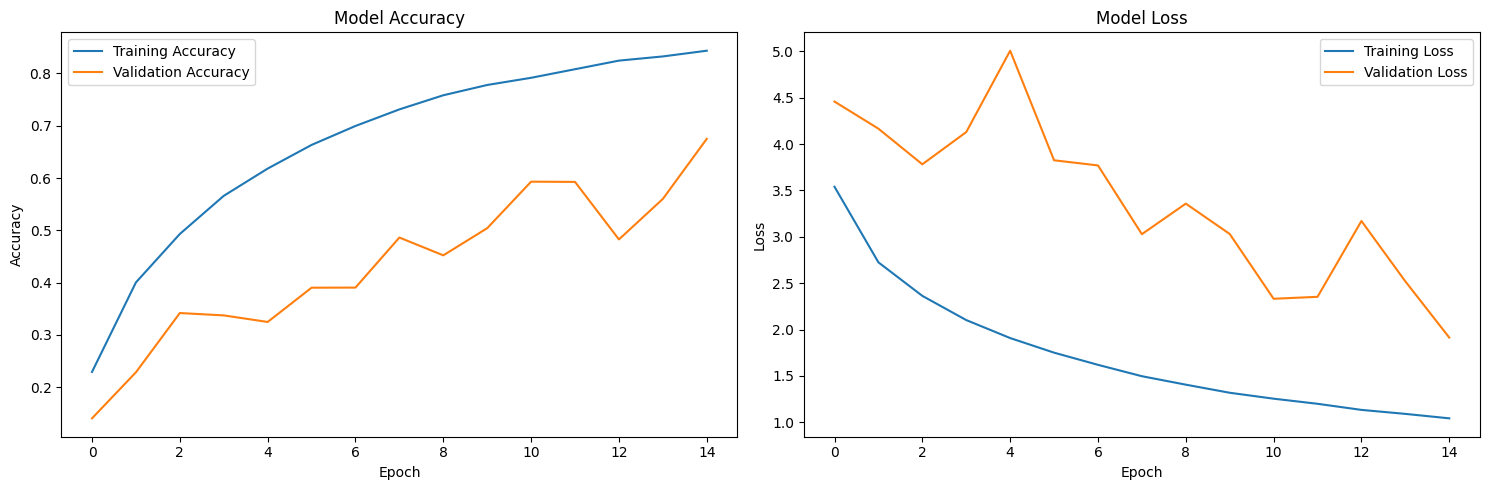

In [24]:
# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot training & validation accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # Plot training & validation loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

In [25]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator, steps=validation_steps)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

134/134 ━━━━━━━━━━━━━━━━━━━━ 58s 430ms/step - accuracy: 0.7127 - loss: 1.6037
Test Accuracy: 0.6739
Test Loss: 1.9185


In [26]:
# Simple prediction function
def predict_image(image_path, model, class_indices):

    try:
        # Load and preprocess image
        img = keras.preprocessing.image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        
        # Make prediction
        predictions = model.predict(img_array, verbose=0)
        predicted_class_index = np.argmax(predictions[0])
        confidence = predictions[0][predicted_class_index]
        
        # Get class name
        class_names = {v: k for k, v in class_indices.items()}
        predicted_class = class_names[predicted_class_index]
        
        return predicted_class, confidence
    except Exception as e:
        print(f"Error predicting image: {e}")
        return None, 0.0

In [27]:
print(f"To use: {predict_image('../image.png', model, train_generator.class_indices)}")


To use: ('Corn_(maize)___healthy', np.float32(0.9999888))
